In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('diabetes.csv', delimiter=',')
print(data.shape)
data = data.loc[~((data['Glucose'] == 0) | (data['BloodPressure'] == 0)|(data['SkinThickness'] == 0) | (data['BMI'] == 0))]
print(data.shape)
print(data.describe().T)

(768, 9)
(532, 9)
                          count        mean         std     min       25%  \
Pregnancies               532.0    3.516917    3.312036   0.000   1.00000   
Glucose                   532.0  121.030075   30.999226  56.000  98.75000   
BloodPressure             532.0   71.505639   12.310253  24.000  64.00000   
SkinThickness             532.0   29.182331   10.523878   7.000  22.00000   
Insulin                   532.0  114.988722  123.007555   0.000   0.00000   
BMI                       532.0   32.890226    6.881109  18.200  27.87500   
DiabetesPedigreeFunction  532.0    0.502966    0.344546   0.085   0.25875   
Age                       532.0   31.614662   10.761584  21.000  23.00000   
Outcome                   532.0    0.332707    0.471626   0.000   0.00000   

                              50%       75%     max  
Pregnancies                 2.000    5.0000   17.00  
Glucose                   115.000  141.2500  199.00  
BloodPressure              72.000   80.0000  110.

In [4]:

d = preprocessing.normalize(data, axis=0)
scaled_df = pd.DataFrame(d, columns = [data.columns])
scaled_df.head()
print(scaled_df.describe().T)
print(type(scaled_df.describe().T))

# norm_data = preprocessing.normalize(Insurance_Data, axis=0)
# norm_df = pd.DataFrame(norm_data,columns=[Insurance_Data.columns])

                          count      mean       std       min       25%  \
Pregnancies               532.0  0.031576  0.029737  0.000000  0.008978   
Glucose                   532.0  0.042002  0.010758  0.019434  0.034270   
BloodPressure             532.0  0.042728  0.007356  0.014341  0.038243   
SkinThickness             532.0  0.040789  0.014710  0.009784  0.030750   
Insulin                   532.0  0.029622  0.031688  0.000000  0.000000   
BMI                       532.0  0.042438  0.008879  0.023484  0.035967   
DiabetesPedigreeFunction  532.0  0.035779  0.024509  0.006047  0.018406   
Age                       532.0  0.041047  0.013972  0.027265  0.029862   
Outcome                   532.0  0.025008  0.035450  0.000000  0.000000   

                               50%       75%       max  
Pregnancies               0.017957  0.044892  0.152634  
Glucose                   0.039910  0.049019  0.069061  
BloodPressure             0.043024  0.047804  0.065730  
SkinThickness        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe6f318430>]],
      dtype=object)

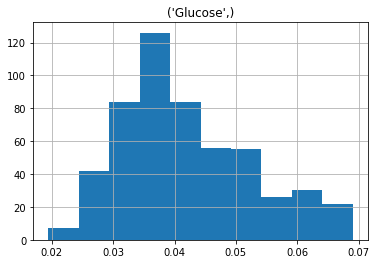

In [5]:
scaled_df.hist(column="Glucose")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe6f259dc0>]],
      dtype=object)

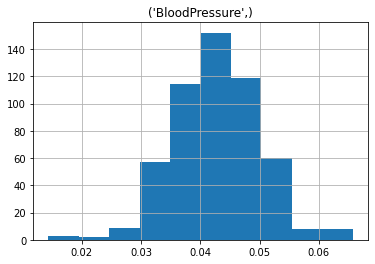

In [6]:
scaled_df.hist(column="BloodPressure")

In [7]:
X = scaled_df.iloc[:,0:8].to_numpy()
# dataset.iloc[:, 4]
print(X)
y = data.iloc[:,8].to_numpy()
print(y)


[[0.05387073 0.0513618  0.04302351 ... 0.0433542  0.0446019  0.06491738]
 [0.00897846 0.02949833 0.03943821 ... 0.03432208 0.02496853 0.04024878]
 [0.00897846 0.03088649 0.03943821 ... 0.03625753 0.01187961 0.0272653 ]
 ...
 [0.01795691 0.04233878 0.04182841 ... 0.04748317 0.02418604 0.03505539]
 [0.04489228 0.04199175 0.04302351 ... 0.03380595 0.01742818 0.03895043]
 [0.00897846 0.03227465 0.04182841 ... 0.03922523 0.02240765 0.029862  ]]
[1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [9]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 78.23
5/5 [==============================] - 0s 3ms/step
[0.008978455111377534, 0.03366280430793926, 0.04063331055416386, 0.029352262142797358, 0.0, 0.03509625765055646, 0.07789327655791634, 0.02856364917989169] => 0 (expected 0)
[0.008978455111377534, 0.049626608412735196, 0.044218602661884196, 0.030749988911501994, 0.01571413262356612, 0.033805954060462474, 0.018210665569704642, 0.02726530148989661] => 0 (expected 0)
[0.0538707306682652, 0.04129766714066775, 0.029877434231002836, 0.030749988911501994, 0.04533913674996127, 0.03496722729154707, 0.09375647351902625, 0.042845473769837536] => 1 (expected 1)
[0.017956910222755067, 0.023598666937524427, 0.037048018446443516, 0.01817044799316027, 0.003864130973008063, 0.025935102160889154, 0.018281800982086302, 0.029861996869886765] => 0 (expected 0)
[0.0269353653341326, 0.03921543182265089, 0.026292142123282496, 0.01817044799316027, 0.0, 0.02890280041810532, 0.009958957733432227, 0.02856364917989169] => 0 (expected 0)


In [11]:
testX = np.copy(x_test)
max = np.max(testX,axis=0)
print(max)

min = np.min(testX,axis=0)
print(min)

[0.12569837 0.06836673 0.06573036 0.07547725 0.1916609  0.06412809
 0.16567438 0.0843926 ]
[0.         0.0194342  0.01792646 0.00978409 0.         0.02348353
 0.00604651 0.0272653 ]


In [12]:
# #pregnancies
# X_preg_max = np.copy(testX)
# for i in range(len(X)):
#     X_preg_max[i][0] = max[0]
# _, accuracy = model.evaluate(X_preg_max, y, verbose=0)
# print('Accuracy: %.2f' % (accuracy*100))
# predictions_preg_max = model.predict(X_preg_max) 

# # reshape = predictions_preg_max.reshape(1,-1)
# # print(reshape)
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_max[i].tolist(), predictions_preg_max[i], y[i]))


In [13]:
prediction_max = []
for j in range(8):
  X_max = np.copy(x_test)
  for i in range(len(x_test)):
    X_max[i][j] = max[j]
  _, accuracy = model.evaluate(X_max, y_test, verbose=0)
  predictions_sub_max = model.predict(X_max) 
  if len(prediction_max) == 0:
    prediction_max = predictions_sub_max
  else:
    prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)
print(prediction_max)


5/5 [==============================] - 0s 3ms/step
[[0.503114   0.81052107 0.18505031 ... 0.32652166 0.61827046 0.40630418]
 [0.47832632 0.5213095  0.18653558 ... 0.33965474 0.85485274 0.4281265 ]
 [0.7747859  0.9261699  0.5722762  ... 0.734806   0.8643728  0.74220055]
 ...
 [0.79461646 0.92795765 0.64219546 ... 0.7155179  0.9743336  0.753632  ]
 [0.5922679  0.8983257  0.36848632 ... 0.51128685 0.8591678  0.6171094 ]
 [0.5384368  0.7873977  0.2060147  ... 0.26237333 0.7816278  0.4500395 ]]


In [14]:
# min = X.min()
# #save a copy
# X_preg_min = testX
# for i in range(len(X)):
#     X_preg_min.iloc[i][1] = min[0]
# _, accuracy = model.evaluate(X_preg_min, y, verbose=0)
# predictions_preg_min = model.predict(X_preg_min) 
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_min.iloc[i].tolist(), predictions_preg_min[i], y.iloc[i]))


In [15]:
prediction_min = []
for j in range(8):
  X_min = np.copy(x_test)
  for i in range(len(x_test)):
    X_min[i][j] = min[j]
  _, accuracy = model.evaluate(X_min, y_test, verbose=0)
  predictions_sub_min = model.predict(X_min) 
  if len(prediction_min) == 0:
    prediction_min = predictions_sub_min
  else:
    prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)
print(prediction_min)


5/5 [==============================] - 0s 3ms/step
[[0.15661976 0.06198519 0.16317564 ... 0.13035245 0.0447986  0.16938871]
 [0.16449355 0.04116711 0.16794413 ... 0.13887665 0.14343955 0.1779798 ]
 [0.39156908 0.19020277 0.5346582  ... 0.46139154 0.15151209 0.46175894]
 ...
 [0.4581666  0.17849235 0.6075857  ... 0.43790746 0.49148032 0.47492197]
 [0.21279812 0.12331961 0.33380967 ... 0.2443953  0.12900588 0.32444823]
 [0.1957752  0.06308637 0.19079381 ... 0.10144825 0.10027453 0.19137399]]


In [16]:
#pregreant difference
result = np.subtract(prediction_max, prediction_min)
print(result.shape)

(160, 8)


In [17]:
# heatmap_diff = pd.DataFrame(result, columns = ['Column_A','Column_B','Column_C'])
heatmap_diff = pd.DataFrame(result, columns = [data.columns[0:8]])
print(heatmap_diff)


    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.346494  0.748536      0.021875      0.162395  0.139008  0.196169   
1      0.313833  0.480142      0.018591      0.156717  0.079345  0.200778   
2      0.383217  0.735967      0.037618      0.237433  0.160329  0.273414   
3      0.058819  0.414761     -0.006410      0.016297  0.019112  0.013508   
4      0.143846  0.401068      0.007533      0.089623  0.074581  0.097447   
..          ...       ...           ...           ...       ...       ...   
155    0.059911  0.669820      0.006084      0.043792  0.007222  0.077513   
156    0.260385  0.713351      0.024278      0.163160  0.059793  0.169373   
157    0.336450  0.749465      0.034610      0.237615  0.092896  0.277610   
158    0.379470  0.775006      0.034677      0.228440  0.168136  0.266892   
159    0.342662  0.724311      0.015221      0.139901  0.088138  0.160925   

    DiabetesPedigreeFunction       Age  
0                   0.573472  0.23

In [18]:
test_heat = heatmap_diff.iloc[0:5,:]
print(test_heat)

  Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0    0.346494  0.748536      0.021875      0.162395  0.139008  0.196169   
1    0.313833  0.480142      0.018591      0.156717  0.079345  0.200778   
2    0.383217  0.735967      0.037618      0.237433  0.160329  0.273414   
3    0.058819  0.414761     -0.006410      0.016297  0.019112  0.013508   
4    0.143846  0.401068      0.007533      0.089623  0.074581  0.097447   

  DiabetesPedigreeFunction       Age  
0                 0.573472  0.236915  
1                 0.711413  0.250147  
2                 0.712861  0.280442  
3                 0.289987  0.012673  
4                 0.636593  0.119155  


Text(58.5, 0.5, 'difference')

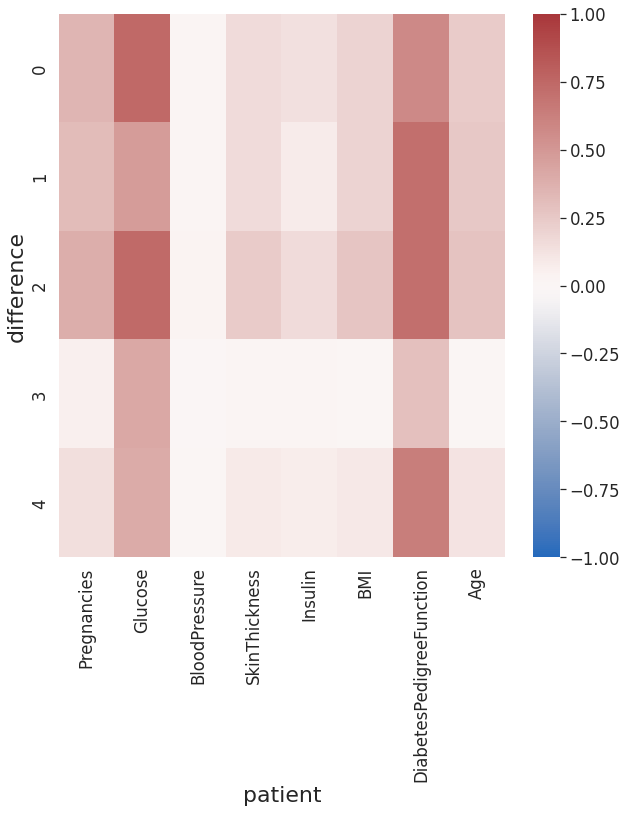

In [19]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
ax = sns.heatmap(test_heat,cmap = sns.color_palette("vlag", as_cmap=True),vmin=-1, vmax=1)

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

Text(58.5, 0.5, 'difference')

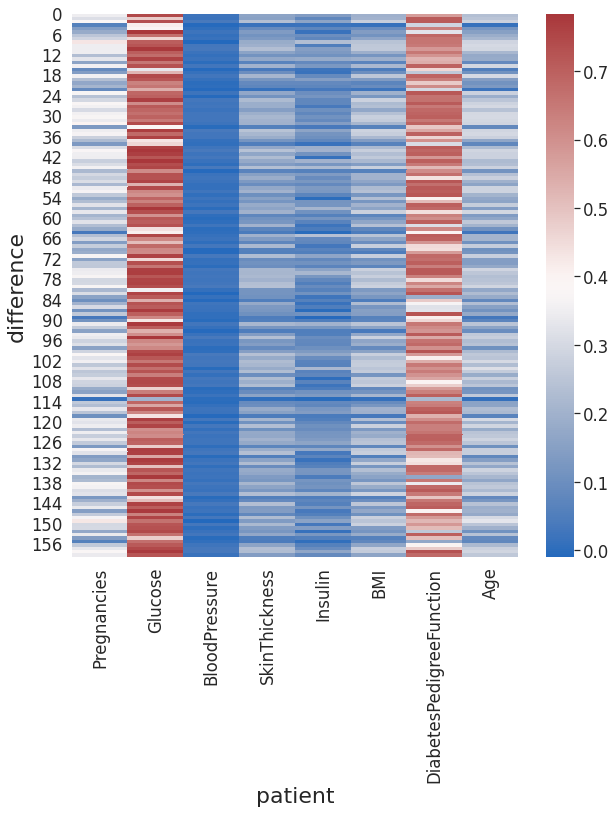

In [20]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

In [21]:
import statsmodels.stats.api as sms
x_test_df = pd.DataFrame(x_test, columns = [data.columns[0:8]])
confid = x_test_df.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]


In [22]:
prediction_high = []
for j in range(8):
  X_high = np.copy(x_test)
  for i in range(len(x_test)):
    X_high[i][j] = high_bd[j]
  _, accuracy = model.evaluate(X_high, y_test, verbose=0)
  predictions_sub_high = model.predict(X_high) 
  if len(prediction_high) == 0:
    prediction_high = predictions_sub_high
  else:
    prediction_high = np.concatenate((prediction_high, predictions_sub_high), axis=1)
print(prediction_high)


5/5 [==============================] - 0s 3ms/step
[[0.22661078 0.3278953  0.17527762 ... 0.21021241 0.08658539 0.22274913]
 [0.21972422 0.11221969 0.17826837 ... 0.22143337 0.26328164 0.23479249]
 [0.47930482 0.5885976  0.55600566 ... 0.6033537  0.27592605 0.5466105 ]
 ...
 [0.54739904 0.59498507 0.6268503  ... 0.57997    0.6801324  0.5596772 ]
 [0.29595062 0.5019093  0.35322502 ... 0.3648138  0.25468212 0.40295795]
 [0.25826257 0.30064115 0.19709328 ... 0.16435589 0.1921426  0.2511559 ]]


In [23]:
prediction_low = []
for j in range(8):
  X_low = np.copy(x_test)
  for i in range(len(x_test)):
    X_low[i][j] = low_bd[j]
  _, accuracy = model.evaluate(X_low, y_test, verbose=0)
  predictions_sub_low = model.predict(X_low) 
  if len(prediction_low) == 0:
    prediction_low = predictions_sub_low
  else:
    prediction_low = np.concatenate((prediction_low, predictions_sub_low), axis=1)
print(prediction_low)


5/5 [==============================] - 0s 3ms/step
[[0.20551229 0.2694785  0.17420107 ... 0.19774379 0.07373589 0.20694534]
 [0.20341426 0.08741976 0.17735401 ... 0.20862676 0.23083691 0.21797964]
 [0.45496124 0.5196451  0.55416197 ... 0.58483374 0.24243581 0.5232994 ]
 ...
 [0.5230713  0.5262415  0.62510246 ... 0.5611523  0.636872   0.536468  ]
 [0.27065557 0.4324376  0.3515213  ... 0.34720635 0.21988074 0.3806298 ]
 [0.23997165 0.24572675 0.19610536 ... 0.15419652 0.16648334 0.23352891]]


In [24]:
result_bd = np.subtract(prediction_high, prediction_low)
print(result_bd.shape)

(160, 8)


In [25]:
heatmap_bd_diff = pd.DataFrame(result_bd, columns = [data.columns[0:8]])
print(heatmap_bd_diff)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.021098  0.058417      0.001077      0.010545 -0.001207  0.012469   
1      0.016310  0.024800      0.000914      0.010181 -0.001273  0.012807   
2      0.024344  0.068953      0.001844      0.015902 -0.009907  0.018520   
3      0.000756  0.019954     -0.000321      0.000315  0.000517  0.000314   
4      0.005685  0.019135      0.000371      0.004816 -0.000488  0.005950   
..          ...       ...           ...           ...       ...       ...   
155    0.005363  0.055552      0.000297      0.002830 -0.001779  0.005124   
156    0.020805  0.062243      0.001186      0.010789 -0.006070  0.011373   
157    0.024328  0.068744      0.001748      0.015718 -0.009410  0.018818   
158    0.025295  0.069472      0.001704      0.015161 -0.008871  0.017607   
159    0.018291  0.054914      0.000988      0.009044 -0.001387  0.010159   

    DiabetesPedigreeFunction       Age  
0                   0.012849  0.01

Text(58.5, 0.5, 'difference')

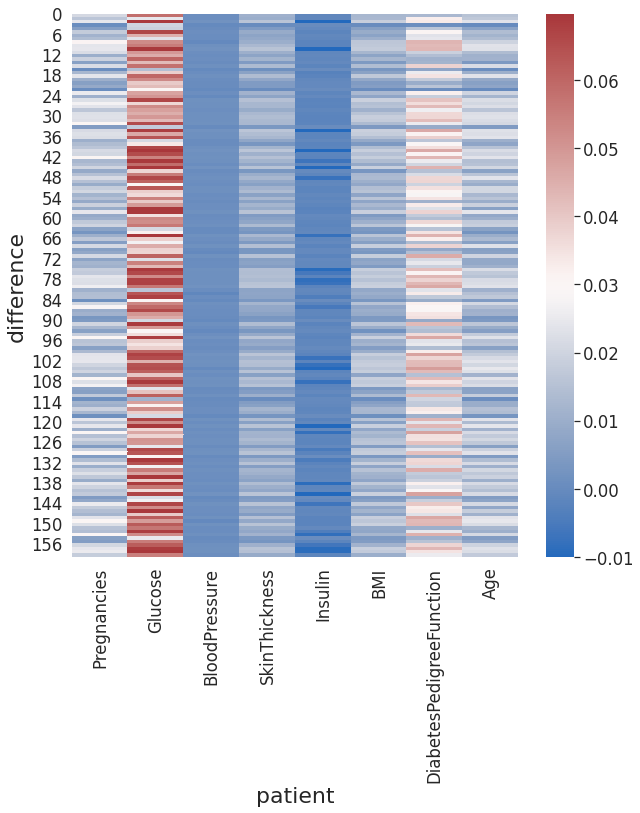

In [26]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True))

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)